<a href="https://colab.research.google.com/github/sydoky/Convolutional-Neural-Networks-CNN-and-Computer-Vision-with-Tensorflow/blob/main/Convolutional_Neural_Networks_(CNN)_and_Computer_Vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Based on detection of classification and autopiloting

import zipfile
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2022-02-04 16:50:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   202MB/s    in 0.5s    

2022-02-04 16:50:48 (202 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak
#ls stand for list 

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
#those are photos
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
#walk through pizza_steak directory and list number of files 

import os 
for dirpath, dirnames,filenames in os.walk("pizza_steak"):
  print("There are {} directories and {} images in {}".format(len(dirnames),len(filenames),dirpath))

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [6]:
import matplotlib.pyplot as plt #for visualizing
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class

  random_image=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print("Image shape: {}".format(img.shape))

  return img
  #we created this function for visualizing dataset

Image shape: (512, 512, 3)


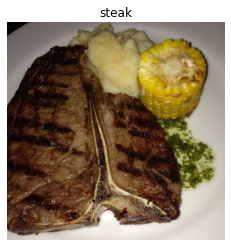

In [7]:
#View a random image from the training dataset

img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="steak")

Image shape: (512, 512, 3)


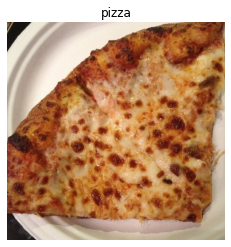

In [8]:
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

In [9]:
#if if i don't plot, i will just get a tensore
img

array([[[109,  72,  28],
        [114,  76,  39],
        [108,  71,  42],
        ...,
        [109,  59,  36],
        [101,  54,  28],
        [112,  65,  37]],

       [[124,  87,  43],
        [117,  79,  42],
        [108,  71,  42],
        ...,
        [110,  62,  39],
        [110,  63,  37],
        [116,  69,  41]],

       [[132,  95,  51],
        [120,  85,  47],
        [115,  78,  49],
        ...,
        [109,  61,  39],
        [119,  73,  47],
        [123,  78,  49]],

       ...,

       [[ 41,  31,  32],
        [ 42,  32,  33],
        [ 43,  33,  34],
        ...,
        [154, 142, 126],
        [153, 141, 125],
        [153, 141, 125]],

       [[ 42,  32,  33],
        [ 42,  32,  33],
        [ 42,  32,  33],
        ...,
        [155, 143, 127],
        [155, 143, 127],
        [154, 142, 126]],

       [[ 42,  32,  33],
        [ 41,  31,  32],
        [ 41,  31,  32],
        ...,
        [155, 143, 127],
        [154, 142, 126],
        [154, 142, 126]]

In [10]:
#Get all the pixels values between 0 and 1 

img/255

array([[[0.42745098, 0.28235294, 0.10980392],
        [0.44705882, 0.29803922, 0.15294118],
        [0.42352941, 0.27843137, 0.16470588],
        ...,
        [0.42745098, 0.23137255, 0.14117647],
        [0.39607843, 0.21176471, 0.10980392],
        [0.43921569, 0.25490196, 0.14509804]],

       [[0.48627451, 0.34117647, 0.16862745],
        [0.45882353, 0.30980392, 0.16470588],
        [0.42352941, 0.27843137, 0.16470588],
        ...,
        [0.43137255, 0.24313725, 0.15294118],
        [0.43137255, 0.24705882, 0.14509804],
        [0.45490196, 0.27058824, 0.16078431]],

       [[0.51764706, 0.37254902, 0.2       ],
        [0.47058824, 0.33333333, 0.18431373],
        [0.45098039, 0.30588235, 0.19215686],
        ...,
        [0.42745098, 0.23921569, 0.15294118],
        [0.46666667, 0.28627451, 0.18431373],
        [0.48235294, 0.30588235, 0.19215686]],

       ...,

       [[0.16078431, 0.12156863, 0.1254902 ],
        [0.16470588, 0.1254902 , 0.12941176],
        [0.16862745, 0

In [11]:
#So far our dataset is done. Now we are going to build a model (apply CNN)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocess data(Normalization/scaling)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Setup our train and test directories
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

#setup data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,#number of images to precess at a time
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)


#Create a CNN Model
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid") # binary activation output


])
#Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 113s 2s/step - loss: 0.5648 - accuracy: 0.7033 - val_loss: 0.4277 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 97s 2s/step - loss: 0.4377 - accuracy: 0.7980 - val_loss: 0.3770 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 97s 2s/step - loss: 0.4224 - accuracy: 0.8033 - val_loss: 0.3304 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 97s 2s/step - loss: 0.3902 - accuracy: 0.8260 - val_loss: 0.3515 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 97s 2s/step - loss: 0.3437 - accuracy: 0.8453 - val_loss: 0.2817 - val_accuracy: 0.8960


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [13]:
tf.random.set_seed(42)

#create a model

model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])


#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit The model
history_2=model_2.fit(train_data,
                      epochs=20,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Epoch 1/20
47/47 [==============================] - 11s 227ms/step - loss: 1.5124 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
47/47 [==============================] - 10s 220ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
47/47 [==============================] - 11s 224ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
47/47 [==============================] - 10s 220ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
47/47 [==============================] - 10s 222ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

# **Adding more layers**

In [14]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3=model_3.fit(train_data,
                      epochs=20,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/20
47/47 [==============================] - 14s 293ms/step - loss: 2.6149 - accuracy: 0.6167 - val_loss: 3.1150 - val_accuracy: 0.5700
Epoch 2/20
47/47 [==============================] - 13s 285ms/step - loss: 0.9408 - accuracy: 0.6947 - val_loss: 0.4437 - val_accuracy: 0.7920
Epoch 3/20
47/47 [==============================] - 13s 284ms/step - loss: 0.4836 - accuracy: 0.7847 - val_loss: 0.4228 - val_accuracy: 0.7860
Epoch 4/20
47/47 [==============================] - 13s 282ms/step - loss: 0.6992 - accuracy: 0.7440 - val_loss: 1.7787 - val_accuracy: 0.5460
Epoch 5/20
47/47 [==============================] - 13s 284ms/step - loss: 0.9857 - accuracy: 0.7253 - val_loss: 0.6275 - val_accuracy: 0.7560
Epoch 6/20
47/47 [==============================] - 13s 286ms/step - loss: 0.6988 - accuracy: 0.7667 - val_loss: 0.5169 - val_accuracy: 0.7680
Epoch 7/20
47/47 [==============================] - 13s 283ms/step - loss: 0.5032 - accuracy: 0.7887 - val_loss: 0.5959 - val_accuracy: 0.7300

In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


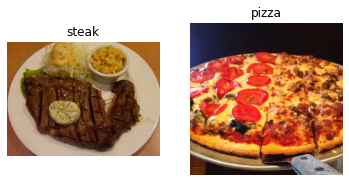

In [16]:
#Visualize data 

plt.figure()

plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

# **2.Preprocess the Data**

In [17]:
#define the training and test directory paths

train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

# *After the preprocessing turn our data into batches. *
# **A batch is a small subset of the dataset a model ooks at during training.**

# **Normally we use 32 batch size (32 images)**


To turn our data into batches we have to create first an instance/an object of imagedatagenerator for each of our dataset

In [18]:
#create train and test data genrators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

#the imgaegenerator class helps us to prepare our images into batches as well as -
#perform transformation on them as they get loaded into the model
#the rescale parameter is an example of the transformation 
#1 by 255 is like saying "divide all the pixel values by 255" -
#These results in all the image been imported and their pixel values been normalize 
#Normalization is converted 0 and 1. 

In [19]:
#Turn it into batches 
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)
#the target size parameter defines the input size of our images in height and width (224, 224) 
#the class mode value of binary defines its classification problem
#if we have more than 2 classes in such situation we will use categorical instead of binary
#the batch size defines how many images in each batch 
#We are going now to take a look at our batched images and lables from the traindata  

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
images,lables=train_data.next()

len(images),len(lables)

(32, 32)

In [21]:
#Get the first two images 
images[:2]

array([[[[0.41960788, 0.4156863 , 0.40000004],
         [0.427451  , 0.42352945, 0.40784317],
         [0.427451  , 0.427451  , 0.41960788],
         ...,
         [0.00784314, 0.01568628, 0.01176471],
         [0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784]],

        [[0.43529415, 0.43137258, 0.41176474],
         [0.43921572, 0.43529415, 0.41960788],
         [0.43529415, 0.43921572, 0.41960788],
         ...,
         [0.03137255, 0.03137255, 0.03137255],
         [0.01568628, 0.01568628, 0.01568628],
         [0.01176471, 0.01176471, 0.01176471]],

        [[0.454902  , 0.4431373 , 0.42352945],
         [0.45098042, 0.43921572, 0.41960788],
         [0.44705886, 0.4431373 , 0.427451  ],
         ...,
         [0.0509804 , 0.04313726, 0.04705883],
         [0.03137255, 0.02352941, 0.02745098],
         [0.02745098, 0.02745098, 0.02745098]],

        ...,

        [[0.50980395, 0.5137255 , 0.52156866],
         [0.5137255 , 0.5176471 , 0.5254902 ]

In [22]:
images[0].shape
#3 is the colors, 224 224 are the width and height

(224, 224, 3)

# **3.Create a Model(Start with a baseline)**

In [23]:
#Make the creating of our model a little easier 

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation 
from tensorflow.keras import Sequential

#Create The Model (3 lyaer Convolutional Neural Network (baseline))

model_4=Sequential([
                    Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)), #input layer(specify input shape)
                  Conv2D(10,3,activation="relu"),
                  Conv2D(10,3,activation="relu"),
                  Flatten(),
                  Dense(1,activation="sigmoid") #Output layer(specify input shape)
])


We are using 2D because
2D: Our inputs are two dimansional(height and width)

Filters:These are the number of "Feature extractors" that will be moving over our images so our model can learn 

kernel_size: The size of our filters.Kernel size 3 means each filter will have the size of 3 x 3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine grained features it will extract. 

strides: The number of pixels a filter will move across as it covers the image. A stride of 1 means the filter move across each pixel 1 by 1. A stride of 2 means it 2 pixels at a time 

padding: This can be either "same" or "valid" . "same" adds zeros to outside of the image so the resulting output of the convolutional layer is the same as the input, where as "valid" cuts of excess pixels where the filter doesn't fit pixels wide divided by a kernel size of 3 (A single pixel will cut off the end)

In [24]:
#Compile the Model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [25]:
#Fit the Model
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 123s 3s/step - loss: 0.9072 - accuracy: 0.7213 - val_loss: 0.4193 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 118s 3s/step - loss: 0.3968 - accuracy: 0.8300 - val_loss: 0.3801 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 115s 2s/step - loss: 0.2584 - accuracy: 0.9040 - val_loss: 0.4178 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 113s 2s/step - loss: 0.1077 - accuracy: 0.9780 - val_loss: 0.4367 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 113s 2s/step - loss: 0.0481 - accuracy: 0.9900 - val_loss: 0.5228 - val_accuracy: 0.8160


steps per epoch: This is the number of batches a model will go through per epoch 1500/32=47steps

validation_steps: Same as above,(500 test images in batches of 32(batches)500/32=16

# 5.Evaluate a model 

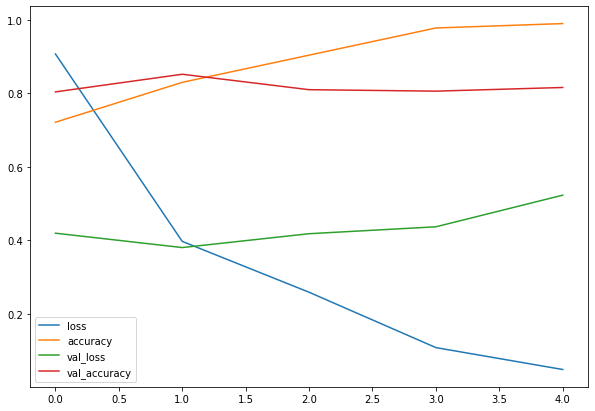

In [26]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

#Model's validations loss start to increase, it's overfitting the training dataset. This means it's learning the patterns in the training 
# dataset too well and it's ability to generalize to unseen data will be diminished. 

In [27]:
#Plot the validation and Training data Separately 

def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #Plot loss

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

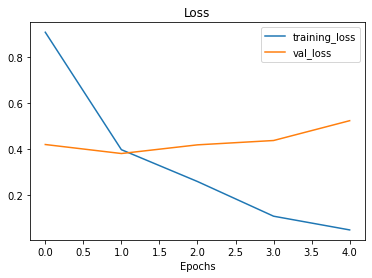

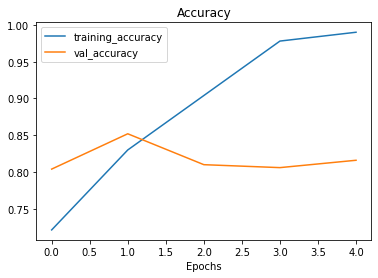

In [28]:
plot_loss_curves(history_4)
#If there is a large gap between the training curve and validation curve, it's probably it's overfitting 

### 6. Adjust the Model Parameters 

-Get More data:

-Simplify Model:

-Use Data Augmentation: (creating a new model) If a model is able to learn patters in augmented data, the model may be able to generalize better to unseen/test data

-Use Transfer Learnning

In [29]:
#Try with a simplified model

import tensorflow as tf

model_5=Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2), #reduce the number of features by half that will help to find out the most important features in model_5.summary you can see how it reduces by half.
                    #The bigger pool size the bigger pool size paramter the more the max pooling layer will squeeze the features out of images 
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 52s 1s/step - loss: 0.6449 - accuracy: 0.6213 - val_loss: 0.4909 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 51s 1s/step - loss: 0.5049 - accuracy: 0.7600 - val_loss: 0.3956 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 54s 1s/step - loss: 0.4549 - accuracy: 0.7960 - val_loss: 0.4250 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 51s 1s/step - loss: 0.4243 - accuracy: 0.7993 - val_loss: 0.3819 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 51s 1s/step - loss: 0.3993 - accuracy: 0.8287 - val_loss: 0.3475 - val_accuracy: 0.8540


In [30]:
len(test_data)

16

In [31]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

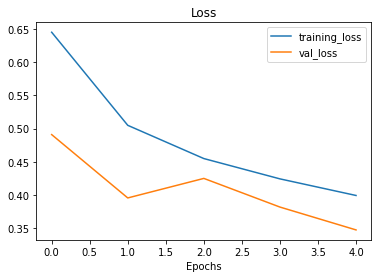

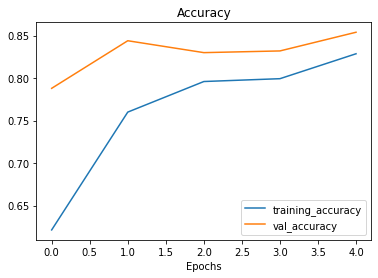

In [32]:
plot_loss_curves(history_5)

Let's Try another method of overfitting prevention which is called Data Augmentation 

In [33]:
#Create ImageDataGenerator training instance with Data Augmentation

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           horizontal_flip=True)

train_datagen=ImageDataGenerator(rescale=1/255.)

test_datagen=ImageDataGenerator(rescale=1/255.)

Data Augmentataion: It's the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image
flipping it, cropping it or something similiar. In other words augmentation is like increasing your dataset to prevent overfitting.  

Overfitting is good for known data but not good for unknown. 

In [34]:
#Import data and augment it from training directory 
print("Augmented Training Images:")

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                class_mode="binary",
                                                                 shuffle=False)

#Create non_augnmented data batches

print("Non-augmented training images:")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

print("Unchanged test images:")
test_data=test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary"
                                          )

Augmented Training Images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [35]:
#Get data batch samples 
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()

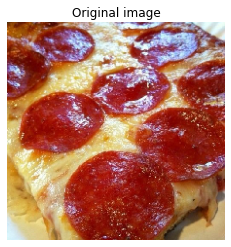

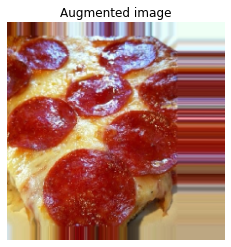

In [36]:
#Show originial image and augmented image
random_number=random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


# We've got augmented data,let's try and refit a model on it and let's see how it affects training. 

In [37]:
import tensorflow as tf

model_6=Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2), #reduce the number of features by half that will help to find out the most important features in model_5.summary you can see how it reduces by half.
                    #The bigger pool size the bigger pool size paramter the more the max pooling layer will squeeze the features out of images 
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 65s 1s/step - loss: 0.6999 - accuracy: 0.4620 - val_loss: 0.6779 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 64s 1s/step - loss: 0.6852 - accuracy: 0.5853 - val_loss: 0.6367 - val_accuracy: 0.5800
Epoch 3/5
47/47 [==============================] - 64s 1s/step - loss: 0.6659 - accuracy: 0.6673 - val_loss: 0.5431 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 64s 1s/step - loss: 0.6129 - accuracy: 0.7047 - val_loss: 0.4997 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 64s 1s/step - loss: 0.5671 - accuracy: 0.7260 - val_loss: 0.4801 - val_accuracy: 0.7460


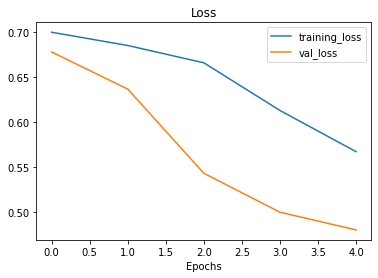

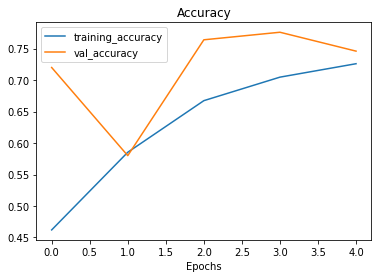

In [38]:
plot_loss_curves(history_6)

# Let's shuffle the aumented training data 

In [39]:
train_data_augmented_shuffled=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Found 1500 images belonging to 2 classes.


In [40]:
import tensorflow as tf

model_7=Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2), #reduce the number of features by half that will help to find out the most important features in model_5.summary you can see how it reduces by half.
                    #The bigger pool size the bigger pool size paramter the more the max pooling layer will squeeze the features out of images 
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_7=model_7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 51s 1s/step - loss: 0.7166 - accuracy: 0.4433 - val_loss: 0.6869 - val_accuracy: 0.5780
Epoch 2/5
47/47 [==============================] - 49s 1s/step - loss: 0.6871 - accuracy: 0.5980 - val_loss: 0.6763 - val_accuracy: 0.5540
Epoch 3/5
47/47 [==============================] - 50s 1s/step - loss: 0.6751 - accuracy: 0.5853 - val_loss: 0.6612 - val_accuracy: 0.5180
Epoch 4/5
47/47 [==============================] - 50s 1s/step - loss: 0.6924 - accuracy: 0.6073 - val_loss: 0.6586 - val_accuracy: 0.5180
Epoch 5/5
47/47 [==============================] - 50s 1s/step - loss: 0.6382 - accuracy: 0.6747 - val_loss: 0.5651 - val_accuracy: 0.7900


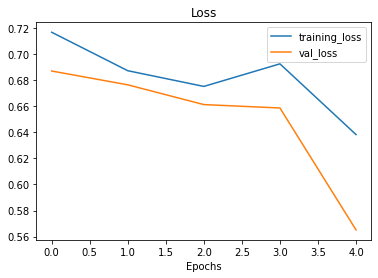

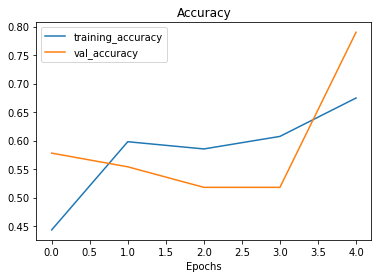

In [41]:
#Next step is checking the model performance 
plot_loss_curves(history_7)

# 7.Repeat until satisfied 

We still could try to continue to improve our model:

-Increase the number of model layers

-Increase the number of filters in each covolutional layer(e.g. from 10 32,54, 128)

-Train for longer (more epochs)

-Finding an ideal learning rate 

-Get more data 

-Use Transfer Learning 

In [42]:
#Continue improving our model

model_8=Sequential([
                    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1,activation="sigmoid")
])
#Compile the Model

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8=model_8.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 100s 2s/step - loss: 0.7014 - accuracy: 0.5233 - val_loss: 0.6707 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 98s 2s/step - loss: 0.6881 - accuracy: 0.5373 - val_loss: 0.6306 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 98s 2s/step - loss: 0.6302 - accuracy: 0.6760 - val_loss: 0.5124 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 98s 2s/step - loss: 0.5341 - accuracy: 0.7680 - val_loss: 0.5380 - val_accuracy: 0.6800
Epoch 5/5
47/47 [==============================] - 98s 2s/step - loss: 0.5196 - accuracy: 0.7467 - val_loss: 0.4948 - val_accuracy: 0.7460


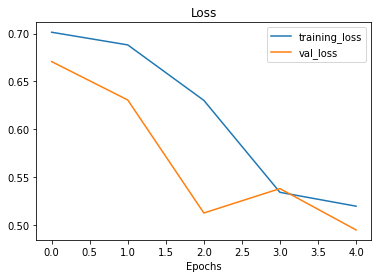

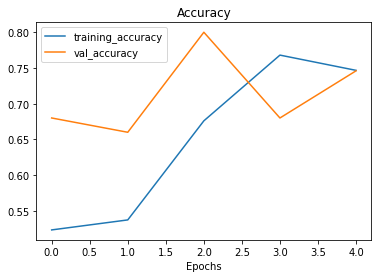

In [43]:
plot_loss_curves(history_8)
#loss should go down, accuracy should go up